<a href="https://colab.research.google.com/github/Derrypearl/Dissertation-code-1/blob/main/code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install shap
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from scipy import stats

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
X=df.drop(['Attrition'],axis=1)
y=df['Attrition']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [ ]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)


In [ ]:
print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 0.83
Testing Accuracy: 0.87


In [ ]:
accuracy=test_accuracy

In [ ]:
   std_error = stats.sem(y_test == test_predictions)

# Calculate the confidence interval
confidence_level = 0.95
conf_interval = stats.t.interval(confidence_level, len(y_test)-1, loc=accuracy, scale=std_error)

print(f"Accuracy: {accuracy:.2f}")
print(f"Confidence Interval: {conf_interval}")


Accuracy: 0.87
Confidence Interval: (0.8283467266043407, 0.9063471509466796)


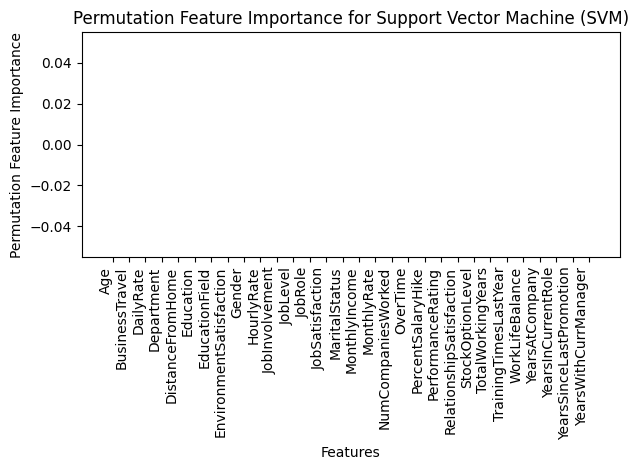

In [ ]:
# Calculate permutation feature importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Create a bar plot to visualize permutation feature importances
plt.bar(feature_names, perm_importance.importances_mean, color='blue')
plt.xlabel('Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Support Vector Machine (SVM)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()






Permutation explainer: 295it [13:19,  2.74s/it]


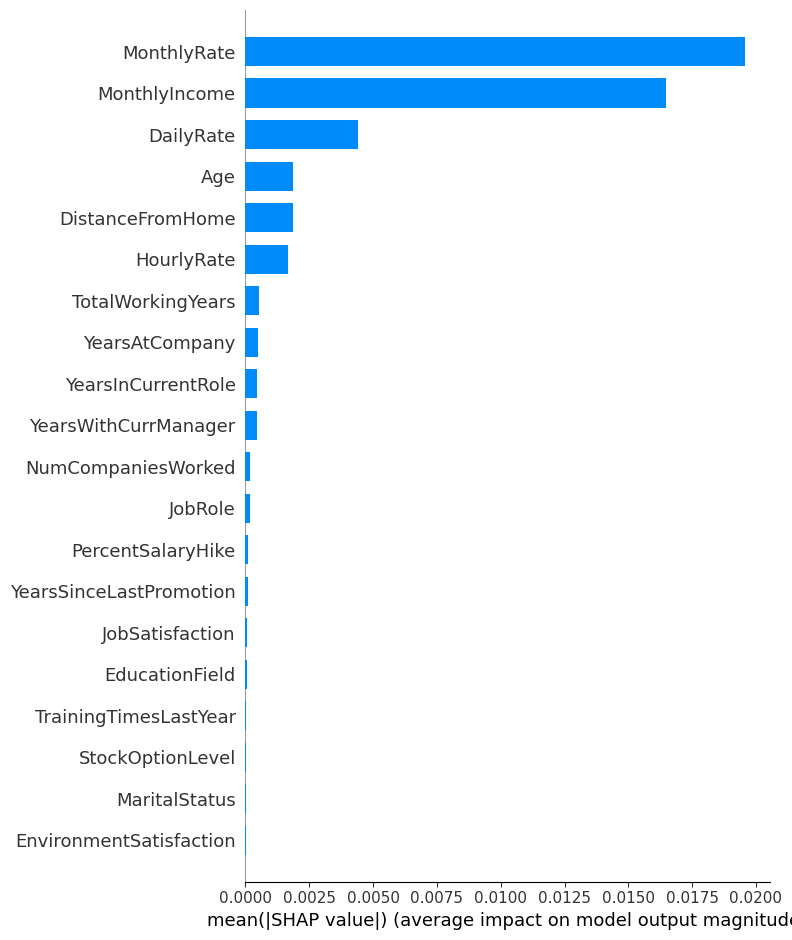

In [ ]:

model = SVC(probability=True)
model.fit(X_train, y_train)

# Define a callable probability function for the SVM
def probability_function(X):
    return model.predict_proba(X)[:, 1]  # Probability of positive class

# Initialize SHAP explainer with the callable probability function
explainer = shap.Explainer(probability_function, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

In [ ]:
shap_values = explainer(X_test)

# Compute mean SHAP values for each feature
mean_shap_values = shap_values.mean(0)

# Get the indices that would sort the mean SHAP values array in descending order
sorted_indices = mean_shap_values.values.argsort()[::-1]

# Reorder feature names based on sorted indices
sorted_feature_names = [X.columns[i] for i in sorted_indices]

# Reorder mean SHAP values
sorted_mean_shap_values = mean_shap_values.values[sorted_indices]

# Print mean SHAP values in descending order
for feature_name, mean_shap in zip(sorted_feature_names, sorted_mean_shap_values):
    print(f"{feature_name}: {mean_shap:.4f}")







Permutation explainer: 295it [10:07,  2.10s/it]

MonthlyIncome: 0.0064
MonthlyRate: 0.0020
DailyRate: 0.0001
NumCompaniesWorked: 0.0000
YearsSinceLastPromotion: 0.0000
EducationField: 0.0000
PercentSalaryHike: 0.0000
OverTime: 0.0000
MaritalStatus: 0.0000
StockOptionLevel: 0.0000
PerformanceRating: 0.0000
BusinessTravel: -0.0000
Gender: -0.0000
Department: -0.0000
JobSatisfaction: -0.0000
Education: -0.0000
JobInvolvement: -0.0000
JobLevel: -0.0000
RelationshipSatisfaction: -0.0000
TrainingTimesLastYear: -0.0000
WorkLifeBalance: -0.0000
EnvironmentSatisfaction: -0.0000
JobRole: -0.0000
YearsInCurrentRole: -0.0000
DistanceFromHome: -0.0001
YearsAtCompany: -0.0001
YearsWithCurrManager: -0.0001
TotalWorkingYears: -0.0001
Age: -0.0005
HourlyRate: -0.0007


In [ ]:
# Print mean SHAP values for each feature
mean_shap_values = shap_values.mean(0)
for feature_name, mean_shap in zip(X.columns, mean_shap_values):
    print(f"{feature_name}: {mean_shap:.4f}")

TypeError: ignored

In [ ]:
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

# Adjust the size of the current plot
fig = plt.gcf()
fig.set_size_inches(4, 2)  # Adjust the dimensions as needed

plt.tight_layout()  # Adjust spacing
plt.show()

In [ ]:
# Create the SHAP summary plot for feature importance
summary_plot = shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar', show=False)

# Adjust the figure size
plt.figure(figsize=(4, 2))  # Adjust the dimensions as needed

# Display the summary plot
summary_plot.show()

plt.tight_layout()  # Adjust spacing
plt.show()






In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar', show=False)
plt.tight_layout()  # Adjust spacing
plt.figure(figsize=(3, 1))  # Adjust figure size
plt.show()

In [ ]:
model = SVC(probability=True)
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot summary plot for feature importance
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type='bar')

In [ ]:
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Create a bar plot to visualize permutation feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, perm_importance.importances_mean, color='black')
plt.xlabel('Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Support Vector Machine (SVM)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()







In [ ]:
# Calculate permutation feature importances
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=42)

# Get feature names
feature_names = X.columns

# Create a bar plot to visualize permutation feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, perm_importance.importances_mean, color=['blue', 'green', 'red', 'purple'])  # Add colors for each feature
plt.xlabel('Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Support Vector Machine (SVM)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
for feature, importance in zip(feature_names, perm_importance.importances_mean):
    print(f"Feature: {feature}, Importance: {importance:.4f}")